In [34]:
# Copyright Simonyan Suren
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

# Загрузка данных

In [ ]:
data = pd.read_csv("fifa_players.csv")

# Информация о данных
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

# Удаление ненужных данных

In [36]:
# Удаление столбцов с отсутствующими значениями и неинформативных столбцов
data = data.drop(columns = ["release_clause_euro", "national_team", "national_rating", "national_team_position",
                           "national_jersey_number", "body_type", "international_reputation(1-5)", "weak_foot(1-5)",
                           "skill_moves(1-5)", "potential", "full_name", "birth_date"], axis = 1)

# Удаление строк с отсутствующими значениями
data = data.dropna()

# Проверка первых строк после очистки
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [37]:
# Фильтрация вратарей из данных (так как вратари имеют другие параметры и навыки)
data = data.query("positions != 'GK'")

# Повторная проверка информации о данных после фильтрации
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15675 entries, 0 to 17953
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               15675 non-null  object 
 1   age                15675 non-null  int64  
 2   height_cm          15675 non-null  float64
 3   weight_kgs         15675 non-null  float64
 4   positions          15675 non-null  object 
 5   nationality        15675 non-null  object 
 6   overall_rating     15675 non-null  int64  
 7   value_euro         15675 non-null  float64
 8   wage_euro          15675 non-null  float64
 9   preferred_foot     15675 non-null  object 
 10  crossing           15675 non-null  int64  
 11  finishing          15675 non-null  int64  
 12  heading_accuracy   15675 non-null  int64  
 13  short_passing      15675 non-null  int64  
 14  volleys            15675 non-null  int64  
 15  dribbling          15675 non-null  int64  
 16  curve              15675 no

# Получение основных статистических характеристик

In [38]:
data.describe()

,age,height_cm,weight_kgs,overall_rating,value_euro,wage_euro,crossing,finishing,heading_accuracy,short_passing,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,15675.000000,15675.000000,15675.000000,15675.000000,1.567500e+04,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,...,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000
mean,25.423604,173.423746,74.436900,66.451994,2.589334e+06,10314.704944,54.302967,49.708708,57.049059,62.650144,...,51.316555,59.670239,50.517703,54.908517,55.532376,52.026475,60.510048,51.321404,52.088293,49.808995
std,4.576273,13.819799,6.722484,6.845031,5.794993e+06,22575.949764,14.115250,16.390709,11.590552,9.809879,...,15.809478,14.304791,18.748556,14.666839,12.892441,12.520332,10.151202,17.213564,19.037903,19.031736
min,17.000000,152.400000,49.900000,47.000000,1.000000e+04,1000.000000,11.000000,10.000000,18.000000,20.000000,...,11.000000,13.000000,10.000000,11.000000,12.000000,11.000000,30.000000,10.000000,10.000000,10.000000
25%,22.000000,154.940000,69.900000,62.000000,3.750000e+05,1000.000000,44.000000,36.000000,49.000000,57.000000,...,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,54.000000,38.000000,35.000000,32.000000
50%,25.000000,175.260000,73.900000,66.000000,7.500000e+05,3000.000000,57.000000,52.000000,58.000000,64.000000,...,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000
75%,29.000000,185.420000,78.900000,71.000000,2.300000e+06,10000.000000,65.000000,63.000000,65.000000,69.000000,...,64.000000,70.000000,65.000000,65.000000,65.000000,61.000000,68.000000,65.000000,67.000000,65.000000
max,40.000000,203.200000,110.200000,94.000000,1.105000e+08,565000.000000,93.000000,95.000000,94.000000,93.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


# Основные наблюдения:
1. Средний возраст — 25-26 лет, хотя максимальный возраст достигает 46 лет.
 2. Средний рост — 170 см.
 3. Средний вес — 75 кг, большинство игроков не слишком тяжелые.
 4. Оценки игроков распределены не равномерно, минимальная — 47, средняя — 75.

# Визуализация распределений данных

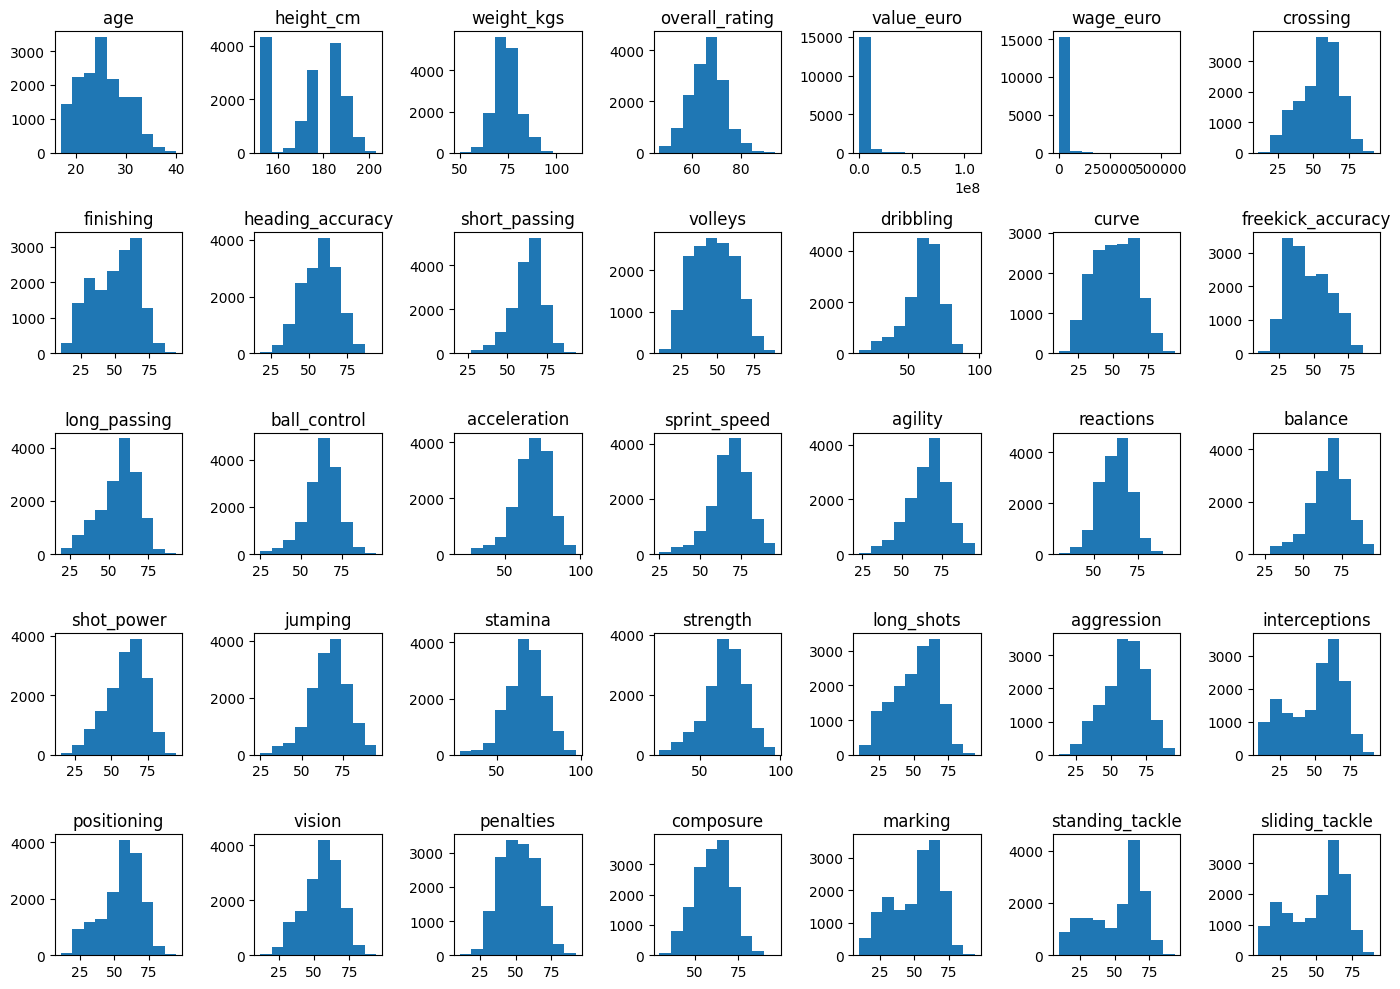

In [39]:
# Гистограмма распределений различных параметров
data.hist(grid=False, layout=(5, 7), figsize=(14, 10))

# Настройка плотного расположения
plt.tight_layout()
plt.show()

# Создание обобщённых навыков для анализа

In [40]:
# Создание интегральных показателей навыков для разных типов
data['physical'] = (data["strength"] + data["sprint_speed"] + data["agility"] + data["reactions"] + data["stamina"] +
                   data["jumping"] + data["balance"] + data["acceleration"])/8

data['defensive_skill'] = (data["sliding_tackle"] + data["standing_tackle"] + data["interceptions"] + data["marking"] +
                          data["positioning"] + data["aggression"])/6

data["football_skills"] = (data["ball_control"] + data["short_passing"] + data["long_passing"] + data["composure"] +
                          data["vision"] + data["dribbling"])/6

data["offensive_skills"] = (data["crossing"] + data["finishing"] + data["long_shots"] + data["volleys"] +
                           data["heading_accuracy"])/5

<Axes: >

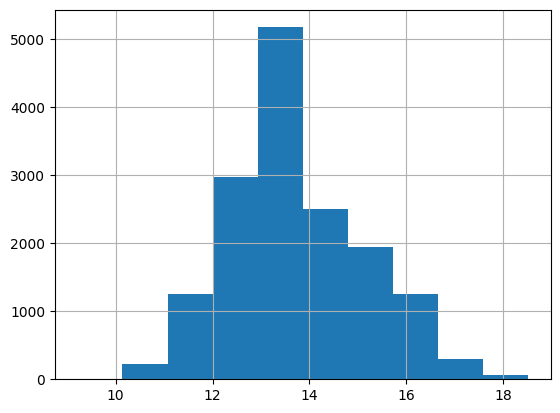

In [41]:
# Использование логарифмического преобразования для уменьшения разброса значений стоимости игроков
data["value_euro"] = np.log(data["value_euro"])
data["value_euro"].hist()

# Визуализация зависимости стоимости игроков от различных навыков

Text(0.5, 1.0, 'Physical ability ~ Player value, euros')

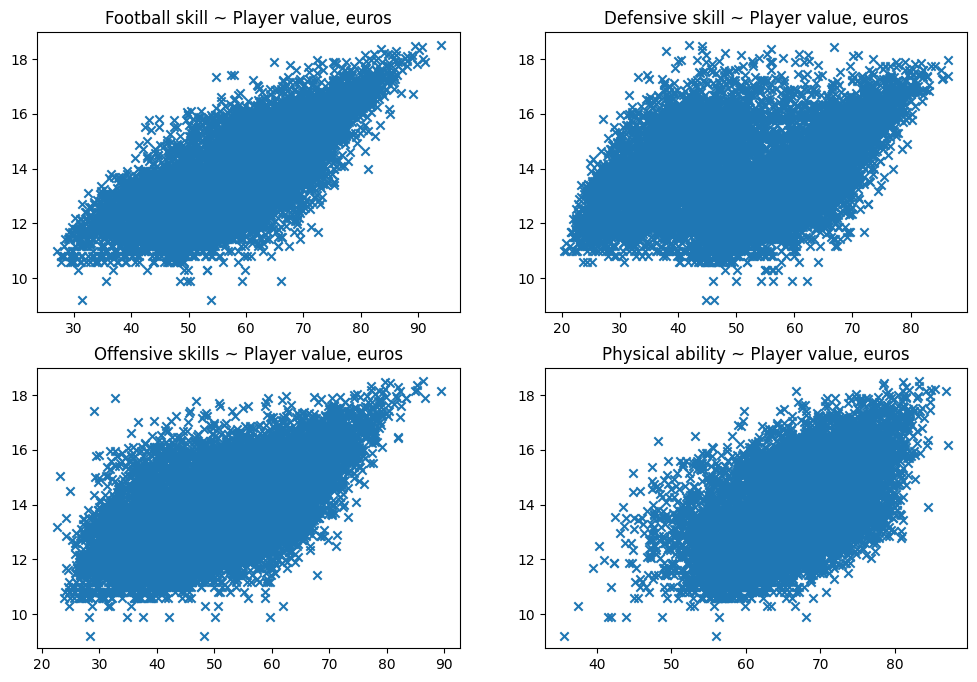

In [42]:
figure, axis = plt.subplots(2, 2, figsize = (12,8))
axis[0,0].scatter(x=data["football_skills"], y = data["value_euro"], marker = 'x')
axis[0,0].set_title("Football skill ~ Player value, euros")

axis[0,1].scatter(x=data["defensive_skill"], y = data["value_euro"], marker = 'x')
axis[0,1].set_title("Defensive skill ~ Player value, euros")

axis[1,0].scatter(x=data["offensive_skills"], y = data["value_euro"], marker = 'x')
axis[1,0].set_title("Offensive skills ~ Player value, euros")

axis[1,1].scatter(x=data["physical"], y = data["value_euro"], marker = 'x')
axis[1,1].set_title("Physical ability ~ Player value, euros")

# Корреляционный анализ


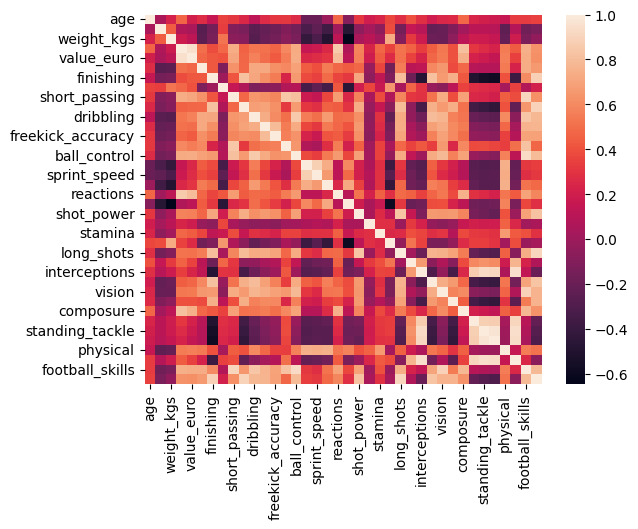

In [43]:
# Построение тепловой карты корреляций между признаками
data_corr = data.drop(columns = ["name", "nationality", "positions", "preferred_foot", "wage_euro"], axis = 1)
cor = data_corr.corr(method = "pearson")
a = sns.heatmap(cor)

# Подготовка данных для моделирования

In [44]:
# Целевая переменная y: логарифм стоимости игрока
y = data["value_euro"]

# Выбор предикторов X для построения модели
X = pd.DataFrame(data=data, columns=(
    'offensive_skills', 'football_skills', 'defensive_skill', 'physical',
    'age', 'height_cm', 'weight_kgs', 'freekick_accuracy', 'penalties'
))

# Просмотр первых строк матрицы предикторов X для проверки
X.head()


,offensive_skills,football_skills,defensive_skill,physical,age,height_cm,weight_kgs,freekick_accuracy,penalties
0,86.2,94.000000,41.833333,83.250,31,170.18,72.1,94,75
1,78.0,89.000000,54.000000,74.750,27,154.94,76.2,87,67
2,79.4,88.000000,70.166667,79.000,25,190.50,83.9,82,82
3,75.4,86.000000,40.000000,77.750,27,162.56,59.0,77,61
4,32.8,64.833333,77.500000,70.875,27,187.96,88.9,28,33


In [45]:
# Создание нового признака для доминирующей ноги игрока: 1 - левая, 0 - правая
left_foot = []
for x in data["preferred_foot"]:
    if x == "Left":
        left_foot.append(1)
    else:
        left_foot.append(0)
X["left"] = left_foot

# Проверка добавленного признака "left" в первых строках X
X.head()

,offensive_skills,football_skills,defensive_skill,physical,age,height_cm,weight_kgs,freekick_accuracy,penalties,left
0,86.2,94.000000,41.833333,83.250,31,170.18,72.1,94,75,1
1,78.0,89.000000,54.000000,74.750,27,154.94,76.2,87,67,0
2,79.4,88.000000,70.166667,79.000,25,190.50,83.9,82,82,0
3,75.4,86.000000,40.000000,77.750,27,162.56,59.0,77,61,0
4,32.8,64.833333,77.500000,70.875,27,187.96,88.9,28,33,0


# Разделение данных на обучающую и тестовую выборки

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=11, test_size=0.25
)

# Обучение линейной модели и предсказание

In [47]:
# Создание и обучение модели линейной регрессии на обучающих данных
model2 = LinearRegression().fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_lin_reg = model2.predict(X_test)

In [48]:
print("Среднеквадратичная ошибка для предсказания логарифма стоимости игроков с линейной регрессией:")
print(mean_squared_error(y_test, y_pred_lin_reg))
# Важно: мы оцениваем логарифм стоимости, поэтому влияние X на стоимость выражается в процентах.

Среднеквадратичная ошибка для предсказания логарифма стоимости игроков с линейной регрессией:
0.5704671248579258


# Обучение модели случайного леса и предсказание

In [49]:
# Модель случайного леса для предсказаний
forest = RandomForestRegressor(
    n_estimators=500,  # Количество деревьев в случайном лесе
    criterion='squared_error',  # Критерий качества разбиения
    random_state=11,  # Фиксируем состояние для воспроизводимости
    max_depth=4  # Максимальная глубина деревьев для снижения переобучения
)

# Обучение модели случайного леса на обучающих данных
model_forest = forest.fit(X_train, y_train)

# Прогнозирование на тестовой выборке с моделью случайного леса
y_pred_forest = model_forest.predict(X_test)

In [50]:
print("Среднеквадратичная ошибка для предсказания логарифма стоимости игроков с моделью случайного леса:")
print(mean_squared_error(y_test, y_pred_forest))
# Модель случайного леса показала меньшую ошибку, что говорит об улучшении предсказательной способности модели.

Среднеквадратичная ошибка для предсказания логарифма стоимости игроков с моделью случайного леса:
0.4750086688492452


# Общие выводы



1. **Целевая переменная и особенности данных**. В качестве целевой переменной мы использовали логарифм стоимости игрока (value_euro). Это позволило сгладить значительные разбросы в значениях и сделать распределение более нормальным, что важно для корректного обучения моделей.

2. **Предобработка и создание признаков.** Были удалены ненужные и пропущенные значения, а также исключены вратари, так как их параметры не сопоставимы с другими позициями на поле.
Были созданы новые признаки, такие как обобщённые характеристики для групп навыков (защитные, атакующие, технические и физические), а также признак для доминирующей ноги игрока. Эти признаки улучшили представление данных и, вероятно, помогли моделям лучше понять значимость различных навыков для стоимости игрока.
3. **Обучение и оценка моделей.** Линейная регрессия продемонстрировала базовый уровень предсказания, но случайный лес показал себя лучше, с меньшей среднеквадратичной ошибкой. Это говорит о том, что стоимость игрока предсказывается не совсем линейно, и модель случайного леса лучше справляется с улавливанием нелинейных зависимостей.
4. **Интерпретация качества моделей.**

**Итог.** В целом, случайный лес оказался наиболее подходящей моделью для данной задачи, что позволяет рекомендовать её для последующего применения или тестирования на схожих задачах.